In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Pre-processing of data

In [2]:
#read data into DataFrame
fish_data = pd.read_csv(r'C:\Users\smit\Downloads\Linear regression\Fish_dataset.csv',header=0)
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [4]:
print(fish_data.dtypes)
print(fish_data.shape)
print(fish_data.describe())

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object
(159, 7)
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [5]:
fish_data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [6]:
for i in fish_data.columns:
    print({i:fish_data[i].unique()})

{'Species': array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)}
{'Weight': array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        475. ,  600. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,
        680. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  150. ,  145. ,  160. ,  140. ,  169. ,  161. ,
        200. ,  180. ,  272. ,  270. ,  306. ,  540. ,  800. ,   55. ,
         60. ,   90. ,  170. ,  273. ,  300. ,    5.9,   32. ,   51.5,
         70. ,  100. ,   80. ,   85. ,  115. ,  125. ,  130. ,  135. ,
        225. ,  188. ,  197. ,  218. ,  260. ,  265. ,  250. ,  320. ,
        514. ,  556. ,  840. ,  690. ,  900. ,  820. , 1015. , 1100. ,
        345. ,  456. ,  510. ,  567. ,  770. , 1250. , 1600. , 1550. ,
       1650. ,    6.7,    7.5,    7. ,    9.7,    9.8,    8.7,   10. ,
          9.9,   12.2,   13.4

Q1: Barplot Showing count of Species

In [7]:
#count of the species

species_count=fish_data['Species'].value_counts()
print(species_count)

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bream'),
  Text(1, 0, 'Roach'),
  Text(2, 0, 'Whitefish'),
  Text(3, 0, 'Parkki'),
  Text(4, 0, 'Perch'),
  Text(5, 0, 'Pike'),
  Text(6, 0, 'Smelt')])

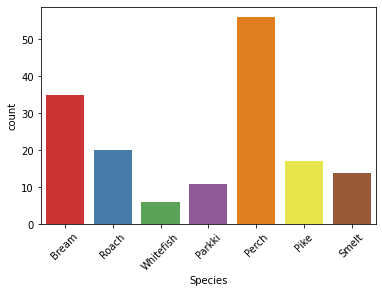

In [8]:
#countplot are useful to visualize the frequency distribution of a single discrete/categorical variables

sns.countplot(x='Species',data=fish_data,palette="Set1")

#Rotate x-labels
plt.xticks(rotation=45)

In [9]:
fish_data['Species']=fish_data.Species.map({'Bream':0, 'Roach':1, 'Whitefish':2, 'Parkki':3, 'Perch':4, 'Pike':5, 'Smelt':6})
print(fish_data)

     Species  Weight  Length1  Length2  Length3   Height   Width
0          0   242.0     23.2     25.4     30.0  11.5200  4.0200
1          0   290.0     24.0     26.3     31.2  12.4800  4.3056
2          0   340.0     23.9     26.5     31.1  12.3778  4.6961
3          0   363.0     26.3     29.0     33.5  12.7300  4.4555
4          0   430.0     26.5     29.0     34.0  12.4440  5.1340
..       ...     ...      ...      ...      ...      ...     ...
154        6    12.2     11.5     12.2     13.4   2.0904  1.3936
155        6    13.4     11.7     12.4     13.5   2.4300  1.2690
156        6    12.2     12.1     13.0     13.8   2.2770  1.2558
157        6    19.7     13.2     14.3     15.2   2.8728  2.0672
158        6    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


Q2: Identifying Outliers & Removing them

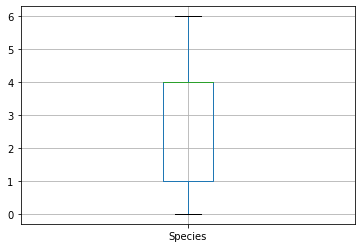

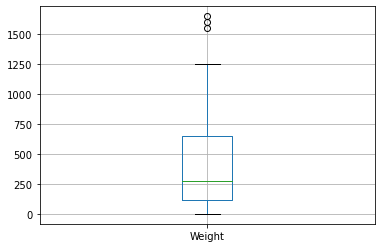

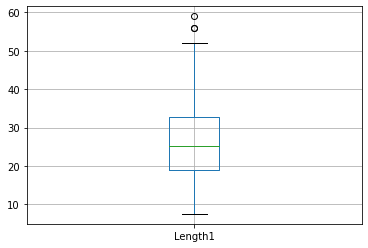

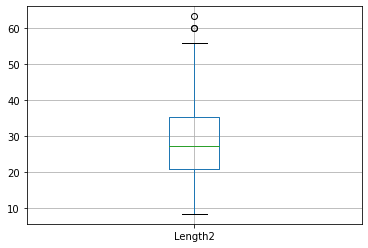

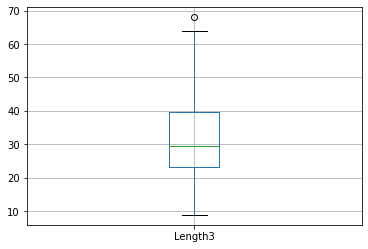

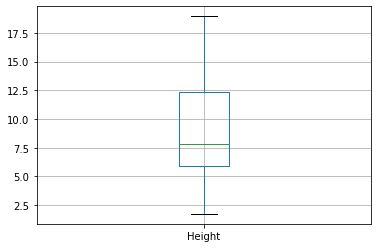

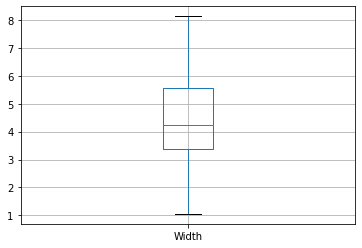

In [10]:
#Asuumption 1: There should be no outliers in the data. Check using boxplot

for i in fish_data.columns:
    fish_data.boxplot(column=i)
    plt.show()

In [11]:
#Outliers are dectected in Weight, Length1, Length2, Length3
#Outliers of Weight
O_weight=fish_data['Weight']
O_weight_Q1=O_weight.quantile(0.25)
O_weight_Q3=O_weight.quantile(0.75)
O_weight_IQR=O_weight_Q3-O_weight_Q1
O_weight_lowerend=O_weight_Q1-(1.5 * O_weight_IQR)
O_weight_upperend=O_weight_Q3+(1.5 * O_weight_IQR)

In [12]:
O_weight_outliers = O_weight[(O_weight < O_weight_lowerend) | (O_weight > O_weight_upperend)]
print(O_weight_outliers)

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64


In [13]:
#outliers of length1
O_length1=fish_data['Length1']
O_length1_Q1=O_length1.quantile(0.25)
O_length1_Q3=O_length1.quantile(0.75)
O_length1_IQR=O_length1_Q3-O_length1_Q1
O_length1_lowerend=O_length1_Q1-(1.5 * O_length1_IQR)
O_length1_upperend=O_length1_Q3+(1.5 * O_length1_IQR)

In [14]:
O_length1_outliers = O_length1[(O_length1 < O_length1_lowerend) | (O_length1 > O_length1_upperend)]
print(O_length1_outliers)

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64


In [15]:
#outliers of length2
O_length2=fish_data['Length2']
O_length2_Q1=O_length2.quantile(0.25)
O_length2_Q3=O_length2.quantile(0.75)
O_length2_IQR=O_length2_Q3-O_length2_Q1
O_length2_lowerend=O_length2_Q1-(1.5 * O_length2_IQR)
O_length2_upperend=O_length2_Q3+(1.5 * O_length2_IQR)

In [16]:
O_length2_outliers = O_length2[(O_length2 < O_length2_lowerend) | (O_length2 > O_length2_upperend)]
print(O_length2_outliers)

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64


In [17]:
#outliers of length3
O_length3=fish_data['Length3']
O_length3_Q1=O_length3.quantile(0.25)
O_length3_Q3=O_length3.quantile(0.75)
O_length3_IQR=O_length3_Q3-O_length3_Q1
O_length3_lowerend=O_length3_Q1-(1.5 * O_length3_IQR)
O_length3_upperend=O_length3_Q3+(1.5 * O_length3_IQR)

In [18]:
O_length3_outliers = O_length3[(O_length3 < O_length3_lowerend) | (O_length3 > O_length3_upperend)]
print(O_length3_outliers)

144    68.0
Name: Length3, dtype: float64


In [20]:
#Outliers of the Dataset are

fish_data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,5,1600.0,56.0,60.0,64.0,9.600,6.144
143,5,1550.0,56.0,60.0,64.0,9.600,6.144
144,5,1650.0,59.0,63.4,68.0,10.812,7.480


In [21]:
fish_data = fish_data.drop([142,143,144])

In [22]:
fish_data.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2.839744,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,2.024039,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,4.000000,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,4.000000,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,6.000000,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


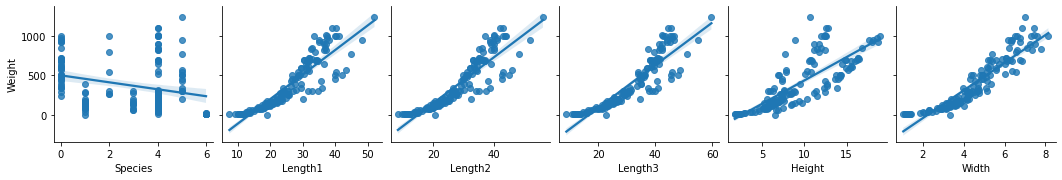

In [23]:
#Assumption 2:Assumption of Linearity:Every ind var should have a linear relatioship with the dep var.

sns.pairplot(fish_data,x_vars=['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'],
            y_vars="Weight",kind='reg')

In [24]:
#Create X and Y
X =fish_data[['Species',  'Length1', 'Length2', 'Length3', 'Height',
       'Width']]
Y = fish_data['Weight']

In [25]:
X.shape

(156, 6)

In [26]:
Y.shape

(156,)

<AxesSubplot:xlabel='Weight', ylabel='Density'>

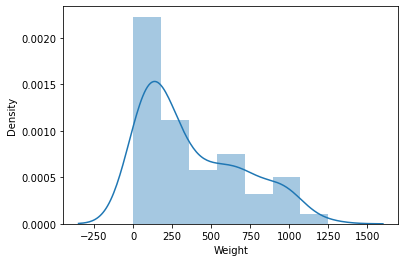

In [28]:
#Assumption of Normality:The dependent variable should follow an approximate normal distribution
sns.distplot(Y,hist=True)

In [29]:
#Log transformation
import numpy as np
Y_log = np.log(Y)

In [30]:
Y_log = Y_log.replace([np.inf, -np.inf, -0], 0)

<AxesSubplot:xlabel='Weight', ylabel='Density'>

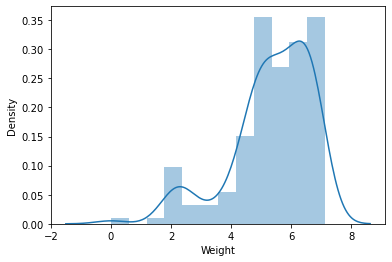

In [31]:
sns.distplot(Y_log,hist=True)
#When infinity values are converted into values the values & normalization is implemented on the 
#right skewed data is converted into left skewed which is creating more error

In [32]:
Y = Y_log

array([[<AxesSubplot:title={'center':'Species'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

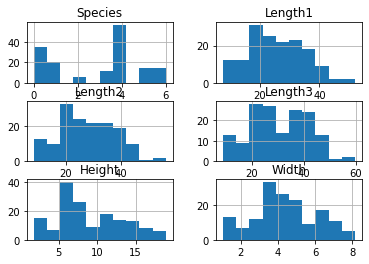

In [33]:
#Its not a assumptions just a good practice
X.hist(bins=10)

In [34]:
from scipy.stats import skew
#finding the skewness in each variable
fish_data_num_skew = X.apply(lambda i: skew(i.dropna()))  #apply functions helps to apply the logic on each variable
#subsetting the variables that are highly skewed
fish_data_num_skewed = fish_data_num_skew[(fish_data_num_skew > .75) | (fish_data_num_skew < -.75)]

print(fish_data_num_skew)
print(fish_data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[fish_data_num_skewed.index] = np.log1p(X[fish_data_num_skewed.index]) 

Species   -0.202223
Length1    0.228738
Length2    0.178621
Length3    0.055049
Height     0.403843
Width      0.026325
dtype: float64
Series([], dtype: float64)


In [35]:
#Assumption of no multicollinearity: There should be no multicollinearity between the independent variables

corr_df=X.corr(method='pearson')
print(corr_df)

          Species   Length1   Length2   Length3    Height     Width
Species  1.000000 -0.182836 -0.201268 -0.297943 -0.709917 -0.351144
Length1 -0.182836  1.000000  0.999418  0.990612  0.676326  0.889166
Length2 -0.201268  0.999418  1.000000  0.993049  0.691954  0.895584
Length3 -0.297943  0.990612  0.993049  1.000000  0.756019  0.897053
Height  -0.709917  0.676326  0.691954  0.756019  1.000000  0.800542
Width   -0.351144  0.889166  0.895584  0.897053  0.800542  1.000000


<AxesSubplot:>

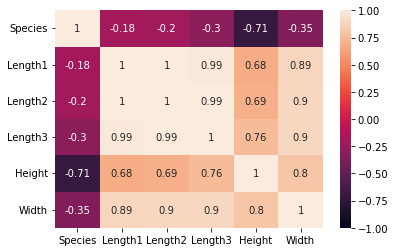

In [36]:
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,Species,3.99
1,Length1,11994.28
2,Length2,16350.45
3,Length3,3379.60
4,Height,77.70
5,Width,97.43


Q3: Building a Regression Model & Regression Equation

In [38]:
from sklearn.model_selection import train_test_split  

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [39]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(124, 6)
(124,)
(32, 6)
(32,)


In [40]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()

#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.4061422375608332
[-0.14505873 -0.27280065  0.52155949 -0.18353126  0.0583889   0.2079525 ]


In [41]:
#pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('Species', -0.1450587342945245), ('Length1', -0.27280065451117413), ('Length2', 0.5215594893978877), ('Length3', -0.18353125842379836), ('Height', 0.0583889023410373), ('Width', 0.20795250361500878)]


In [45]:
#Y_test is always used for comparison not for testing

#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[4.31114549 6.07733667 4.65937748 4.58393318 5.34375034 6.98194284
 4.86888952 2.62948878 6.89755678 4.7566921  3.83652421 4.82932114
 4.593218   2.59952154 6.3550832  6.2614022  5.47381964 4.11023795
 5.02654758 4.64999644 6.63587903 4.98338652 6.42943587 4.53670867
 4.29939982 5.54011091 4.86171099 4.49931006 7.03286203 6.50990213
 4.50968965 5.69900283]


In [46]:
lm.score(X_train,Y_train)

0.8685532024925771

In [47]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual weights"]=Y_test
new_df["Predicted weights"]=Y_pred
new_df

,Species,Length1,Length2,Length3,Height,Width,Actual weights,Predicted weights
81,4,18.2,20.0,21.0,5.0820,2.7720,4.442651,4.311145
10,0,28.4,31.0,36.2,14.2628,5.1042,6.163315,6.077337
91,4,20.5,22.5,24.0,5.8560,3.6240,4.867534,4.659377
67,3,19.0,20.7,23.2,9.3960,3.4104,5.135798,4.583933
55,2,23.6,26.0,28.7,8.3804,4.2476,5.598422,5.343750
120,4,37.0,40.0,42.5,11.7300,7.2250,6.802395,6.981943
99,4,23.0,25.0,26.5,6.4395,3.6835,5.192957,4.868890
153,6,11.4,12.0,13.2,2.2044,1.1484,2.282382,2.629489
60,2,37.3,40.0,43.5,12.3540,6.5250,6.907755,6.897557
43,1,20.4,22.0,24.7,5.8045,3.7544,5.010635,4.756692


In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9388455858643263
RMSE: 0.2772741765641081
Adj R-square: 0.936382992006514


In [49]:
print(Y_test.min())
print(Y_test.max())

2.2823823856765264
6.907755278982137


In [50]:
new_df["Deviation"]=new_df["Actual weights"]-new_df["Predicted weights"]
new_df.to_excel("Weights Prediction.xlsx",header=True,index=True)
new_df.head()

,Species,Length1,Length2,Length3,Height,Width,Actual weights,Predicted weights,Deviation
81,4,18.2,20.0,21.0,5.0820,2.7720,4.442651,4.311145,0.131506
10,0,28.4,31.0,36.2,14.2628,5.1042,6.163315,6.077337,0.085978
91,4,20.5,22.5,24.0,5.8560,3.6240,4.867534,4.659377,0.208157
67,3,19.0,20.7,23.2,9.3960,3.4104,5.135798,4.583933,0.551865
55,2,23.6,26.0,28.7,8.3804,4.2476,5.598422,5.343750,0.254672


Q4: Mean score of the model at 95% confidence interval

In [51]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(Y_test,Y_pred)
print(mse)

0.07688096898930419


Q5: Comparing real and predicted weights

In [52]:
real_w = pd.DataFrame(new_df,columns=["Actual weights"])
print(real_w)

     Actual weights
81         4.442651
10         6.163315
91         4.867534
67         5.135798
55         5.598422
120        6.802395
99         5.192957
153        2.282382
60         6.907755
43         5.010635
35         3.688879
97         4.976734
85         4.867534
151        2.302585
19         6.476972
58         6.291569
1          5.669881
63         4.499810
129        5.703782
39         4.787492
24         6.551080
128        5.298317
21         6.529419
38         4.465908
79         4.382027
131        5.703782
96         5.416100
83         4.744932
119        6.745236
117        6.476972
66         4.941642
2          5.828946


In [53]:
pred_w = pd.DataFrame(new_df,columns=["Predicted weights"])
print(pred_w)

     Predicted weights
81            4.311145
10            6.077337
91            4.659377
67            4.583933
55            5.343750
120           6.981943
99            4.868890
153           2.629489
60            6.897557
43            4.756692
35            3.836524
97            4.829321
85            4.593218
151           2.599522
19            6.355083
58            6.261402
1             5.473820
63            4.110238
129           5.026548
39            4.649996
24            6.635879
128           4.983387
21            6.429436
38            4.536709
79            4.299400
131           5.540111
96            4.861711
83            4.499310
119           7.032862
117           6.509902
66            4.509690
2             5.699003


In [54]:
devia_w = pd.DataFrame(new_df,columns=["Deviation"])
print(devia_w)

     Deviation
81    0.131506
10    0.085978
91    0.208157
67    0.551865
55    0.254672
120  -0.179548
99    0.324067
153  -0.347106
60    0.010199
43    0.253943
35   -0.147645
97    0.147413
85    0.274316
151  -0.296936
19    0.121889
58    0.030167
1     0.196061
63    0.389572
129   0.677235
39    0.137495
24   -0.084799
128   0.314931
21    0.099983
38   -0.070801
79    0.082627
131   0.163672
96    0.554389
83    0.245622
119  -0.287626
117  -0.032930
66    0.431953
2     0.129943


In [55]:
Y_compare = pd.concat([real_w,pred_w,devia_w], axis=1)
Y_compare

,Actual weights,Predicted weights,Deviation
81,4.442651,4.311145,0.131506
10,6.163315,6.077337,0.085978
91,4.867534,4.659377,0.208157
67,5.135798,4.583933,0.551865
55,5.598422,5.343750,0.254672
120,6.802395,6.981943,-0.179548
99,5.192957,4.868890,0.324067
153,2.282382,2.629489,-0.347106
60,6.907755,6.897557,0.010199
43,5.010635,4.756692,0.253943


When the value of weights is large the deviation of actual & predicted weights is somewhat in a range. But when the values of weights is small then the deviation of actual & predicted weights is showing errors as some values are in neagtive range & some are out of range